## Calculate and plot results for individual number estimation
requires simulation results from `pop_gen_run_pedsim.ipynb`

In [1]:
import numpy as np
import os as os
import sys as sys
import multiprocessing as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py as h5py
from scipy import interpolate
from scipy import stats
import logging
from itertools import product
from matplotlib.backends.backend_pdf import PdfPages
import datetime

# Disable matplotlib warnings
logger = logging.getLogger('matplotlib')
logger.setLevel(logging.ERROR)

# Set correct font type for image saving
from matplotlib import rcParams  
rcParams['font.family'] = 'sans-serif'  
rcParams['font.sans-serif'] = ['Arial'] 
rcParams['font.size'] = 15
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

# Show the current working directory
print(os.getcwd()) 
os.chdir('./ped-sim')

print(f"CPU Count: {mp.cpu_count()}")

/home/marcus/Project/BLG_analysis/kinship_structure
CPU Count: 12


## Function for calculating matrix similarity

In [2]:
from seg_process import matrix_simmilarity

orates = [0]
pop_ranges = [(50,100),(100,150),(150,200),(200,300),(300,400),(400,500)]
tree_rep = 1200
samp_rep = 50

def get_similarities(matrix_backup, ref_matrix):
    # calculate similarity df
    similarity_backup = np.zeros((samp_rep, tree_rep, len(orates), len(pop_ranges)))

    for k in range(len(orates)):
        for l in range(len(pop_ranges)):
            print((k,l),end = ',') 
            similarity_df_temp = np.zeros((samp_rep, tree_rep))
            for j in range(tree_rep):
                for i in range(samp_rep):
                    similarity_df_temp[i,j] = matrix_simmilarity(matrix_backup[:,:,i,j,k,l],ref_matrix)
            similarity_backup[:,:,k,l] = similarity_df_temp
                     
    return similarity_backup    

## Apply to BLG data and plot results

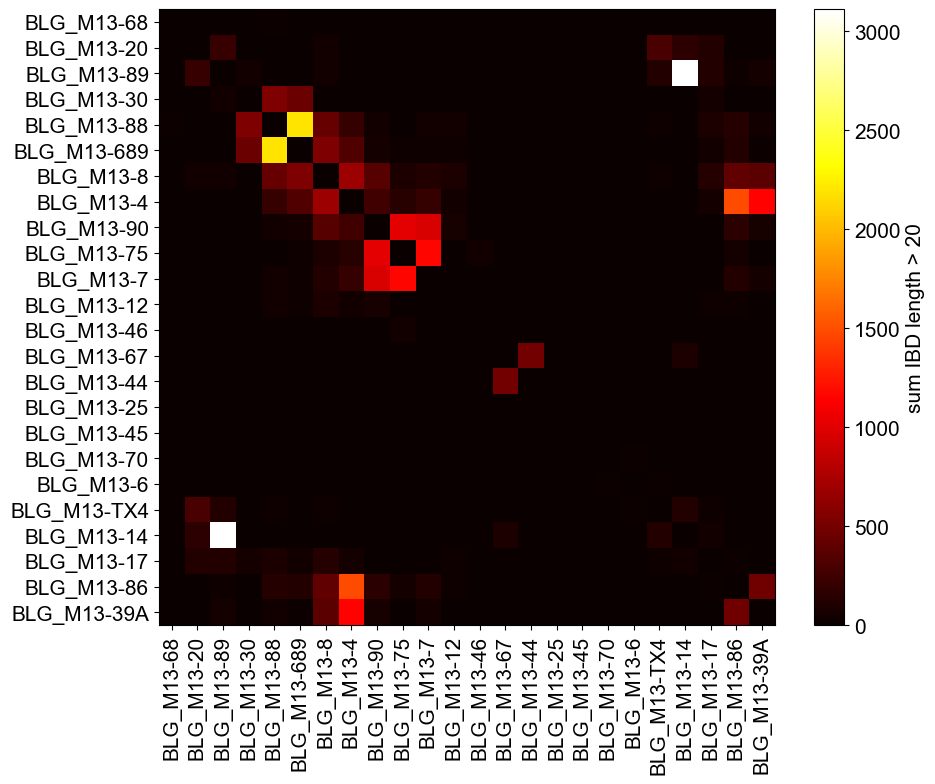

In [3]:
from seg_process import generate_matrix, matrix_simmilarity
np.random.seed(12)

BLG_df = pd.read_csv('../All_ibd_ind.d220.filtered0.15x.csv')
BLG_df = BLG_df[BLG_df['iid1'].str.startswith('BLG_M13') & BLG_df['iid2'].str.startswith('BLG_M13')]
BLG_sex_df = pd.read_csv('../Baligang1.csv',usecols=['Sample','sex','MT haplotype'])
BLG_sex_df.columns = ['iid', 'sex', 'mt']

BLG_matrix_cl = generate_matrix(BLG_df, BLG_sex_df, order = 'level', keep_sex = True, plot = True, clustering=True)

### Calculate matrix similarities

In [5]:
import gc

matrix_paths = sorted([x for x in os.listdir('../result_npys') if 'matrix_backup' in x])
centrality_paths = sorted([x for x in os.listdir('../result_npys') if 'centralities' in x])
tree_paths = sorted([x for x in os.listdir('../result_npys') if 'tree_names' in x])

result_lists = []
tree_lists = []
centrality_lists = []

for i in range(len(matrix_paths)):
    matrix_backup = np.load(os.path.join('../result_npys',matrix_paths[i]))
    centrality_backup = np.load(os.path.join('../result_npys',centrality_paths[i]))
    tree_backup = np.load(os.path.join('../result_npys',tree_paths[i]))
    
    if tree_backup.shape[2]==2: # full population mode
        continue
    
    if tree_backup.shape[0]!=1200:
        tree_backup = np.concatenate((tree_backup[:,:int(tree_backup.shape[1]/2),:],tree_backup[:,int(tree_backup.shape[1]/2):,:]),axis = 0)
    if centrality_backup.shape[0]!=1200:
        centrality_backup = np.concatenate((centrality_backup[:,:int(centrality_backup.shape[1]/2),:],centrality_backup[:,int(centrality_backup.shape[1]/2):,:]),axis = 0)
    if matrix_backup.shape[3]!=1200:
        matrix_backup = np.concatenate((matrix_backup[:,:int(matrix_backup.shape[1]/2),:,:,:,:],matrix_backup[:,int(matrix_backup.shape[1]/2):,:,:,:,:]),axis = 3)
    
    if i==0:
        similarity_backup1 = get_similarities(matrix_backup, ref_matrix = BLG_matrix_cl)
        centrality_backup1 = centrality_backup[:,0,:]
        tree_backup1 = tree_backup[:,0,:]
    else:
        similarity_new = get_similarities(matrix_backup, ref_matrix = BLG_matrix_cl)
        centrality_new = centrality_backup[:,0,:]
        tree_new = tree_backup[:,0,:]

        similarity_backup1 = np.concatenate((similarity_backup1,similarity_new), axis = 1)
        centrality_backup1 = np.concatenate((centrality_backup1,centrality_new), axis = 0)
        tree_backup1 = np.concatenate((tree_backup1,tree_new), axis = 0)
    
    del matrix_backup
    gc.collect()


(0, 0),(0, 1),(0, 2),(0, 3),(0, 4),(0, 5),(0, 0),(0, 1),(0, 2),(0, 3),(0, 4),(0, 5),(0, 0),(0, 1),(0, 2),(0, 3),(0, 4),(0, 5),(0, 0),(0, 1),(0, 2),(0, 3),(0, 4),(0, 5),

### Summarize & plot

u = 2438.0, p = 2.6913129710126445e-16, n0,n2 = 50,50
u = 1852.0, p = 3.3740073165391645e-05, n1,n2 = 50,50
u = 1517.0, p = 0.06617993344569598, n3,n2 = 50,50
u = 2495.0, p = 9.540342289434705e-18, n4,n2 = 50,50
u = 2500.0, p = 7.066071930388932e-18, n5,n2 = 50,50


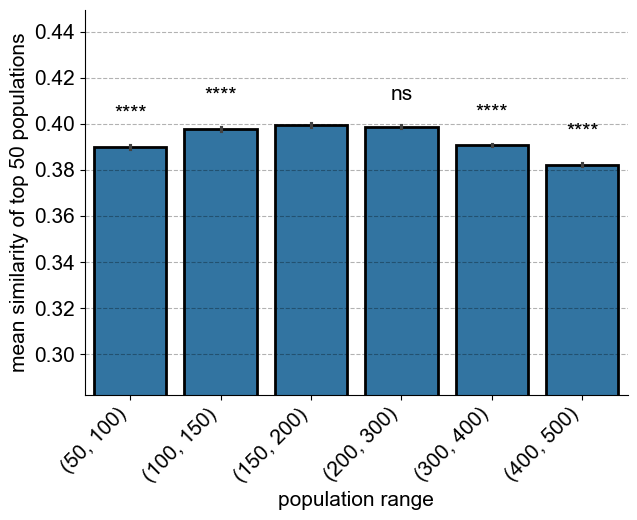

u = 21370502.0, p = 0.0, n0,n2 = 4800,4800
u = 15036295.0, p = 6.904864253920781e-148, n1,n2 = 4800,4800
u = 14160562.0, p = 2.9973409229758647e-84, n3,n2 = 4800,4800
u = 20192774.0, p = 0.0, n4,n2 = 4800,4800
u = 22521630.0, p = 0.0, n5,n2 = 4800,4800


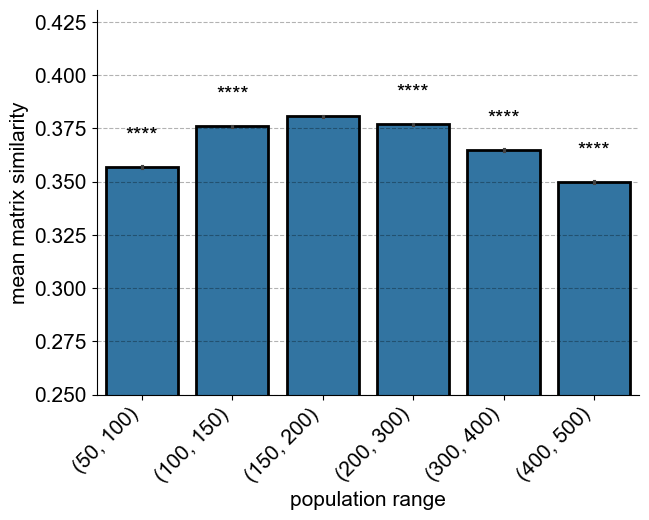

u = 9540.0, p = 1.3754849399410485e-28, n0,n4 = 100,100
u = 9080.0, p = 2.108368190139229e-23, n1,n4 = 100,100
u = 7554.0, p = 4.3983258151136004e-10, n2,n4 = 100,100
u = 6294.0, p = 0.0015748588673184004, n3,n4 = 100,100
u = 5753.0, p = 0.06596666177209563, n5,n4 = 100,100


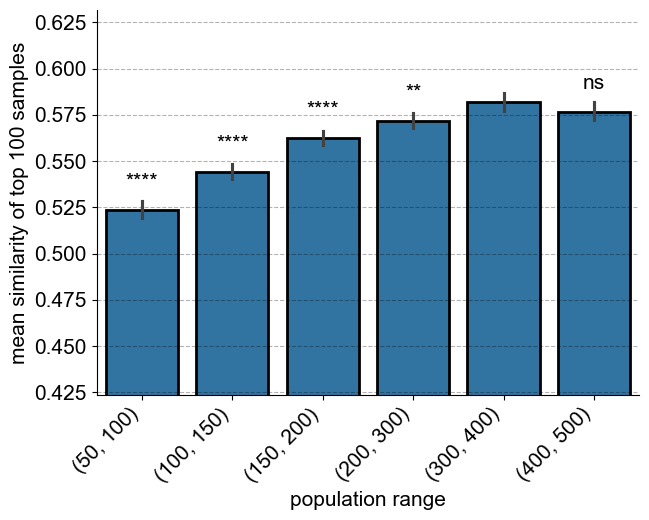

In [ ]:
from post_processing_plot import plot_bar_label_max

mean_similarity_by_tree = np.squeeze(np.mean(similarity_backup1, axis = 0))

similarity_df_flat = np.sort(mean_similarity_by_tree,axis = 0)
top50_similarity = np.squeeze(similarity_df_flat[-50:,:])

similarity_backup_flat = similarity_backup1.reshape(-1, *similarity_backup1.shape[2:])
similarity_backup_flat = np.sort(similarity_backup_flat,axis = 0)
top100_sample_similarity = np.squeeze(similarity_backup_flat[-100:,:,:])

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
plt.rcParams.update({'pdf.fonttype': 42})
plt.rcParams.update({'ps.fonttype': 42})

timestamp = datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
pdf = PdfPages(f'../plots/BLG_population_estimation_{timestamp}.pdf')

pop_ranges_str = [f'{pop}' for pop in pop_ranges]

# fig1 = plot_bar_label_max(max_similarity_by_tree, pop_ranges_str,  ylabel='pedigree centrality range',quantity = 'max matrix similarity by tree')
fig2 = plot_bar_label_max(top50_similarity, pop_ranges_str,  ylabel='mean similarity of top 50 populations',quantity = '', test_method='ttest')
fig3 = plot_bar_label_max(mean_similarity_by_tree, pop_ranges_str,  ylabel='mean matrix similarity', quantity = '', test_method='ttest')
fig4 = plot_bar_label_max(top100_sample_similarity, pop_ranges_str,  ylabel='mean similarity of top 100 samples', quantity = '', test_method='ttest')

with open(f'../plots/Fig_S13D_data_1.txt','w') as datfile:
    datfile.write('Pedigree size range\t'+'\t'.join(pop_ranges_str)+'\n')
    for line in top50_similarity:
        datfile.write('Similarity of top 50 pedigrees\t'+'\t'.join([str(num) for num in line])+'\n')

with open(f'../plots/Fig_S13D_data_2.txt','w') as datfile:
    datfile.write('Pedigree size range\t'+'\t'.join(pop_ranges_str)+'\n')
    for line in top100_sample_similarity:
        datfile.write('Similarity of top 100 samples\t'+'\t'.join([str(num) for num in line])+'\n')

rcParams.update(plt.rcParamsDefault)
rcParams['font.family'] = 'sans-serif' 
rcParams['font.sans-serif'] = ['Arial']  
rcParams['font.size'] = 15

plt.rcParams.update({'pdf.fonttype': 42})
plt.rcParams.update({'ps.fonttype': 42})
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

all_figs = [fig2,fig3,fig4]

# for fign in all_figs:
#     pdf.savefig(fign, bbox_inches='tight')
    
# pdf.close()

## Validate on artificial data

### Load and plot

previously generated on cluster in `pop_gen_run_pedsim.ipynb`

In [6]:
use_top = 100

test_data_1 = np.load('../result_npys/test_data_pop_0225_1.npy')
test_data_2 = np.load('../result_npys/test_data_pop_0225_1_part2.npy')

top_sim_1 = np.load('../result_npys/top_similarity_data_pop_0225_1.npy')
top_sim_2 = np.load('../result_npys/top_similarity_data_pop_0225_1_part2.npy')

test_data_temp1 = np.concatenate((test_data_1[:,:,:3], test_data_2), axis = 2)
top_sim_temp1 = np.concatenate((top_sim_1[:,:,:3], top_sim_2), axis = 2)

test_data_1 = np.load('../result_npys/test_data_pop_0226_1_part1.npy')
test_data_2 = np.load('../result_npys/test_data_pop_0226_1_part2.npy')

top_sim_1 = np.load('../result_npys/top_similarity_data_pop_0226_1_part1.npy')
top_sim_2 = np.load('../result_npys/top_similarity_data_pop_0226_1_part2.npy')

test_data_temp2 = np.concatenate((test_data_1, test_data_2), axis = 2)
top_sim_temp2 = np.concatenate((top_sim_1, top_sim_2), axis = 2)

top_sim = np.concatenate((top_sim_temp1,top_sim_temp2), axis = 1)
test_data = np.concatenate((test_data_temp1,test_data_temp2), axis = 1)
test_data[3,:,:,:] = np.mean(top_sim[-use_top:,:,:,:],axis = 0)

test_data.shape

(4, 400, 9, 6)

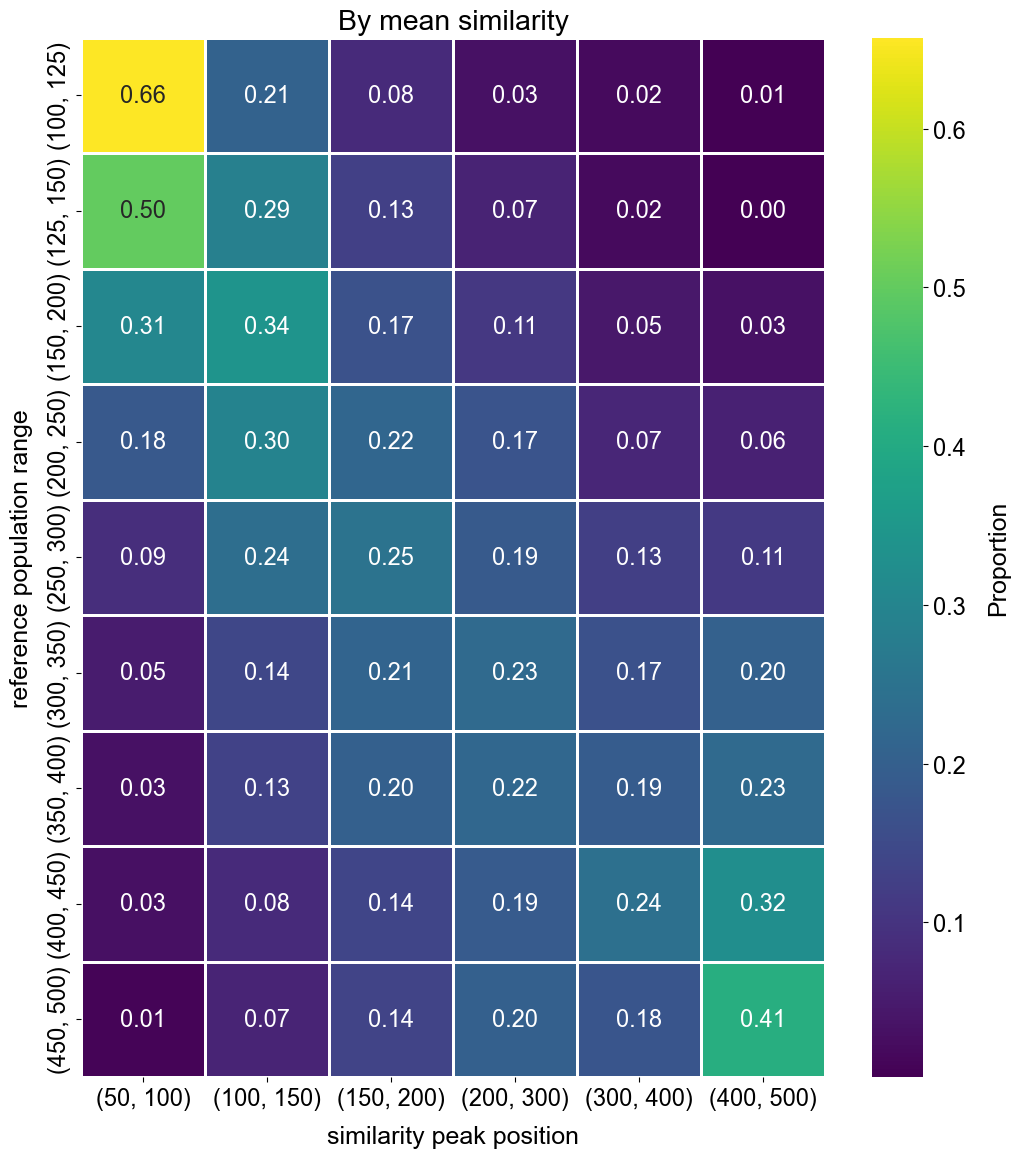

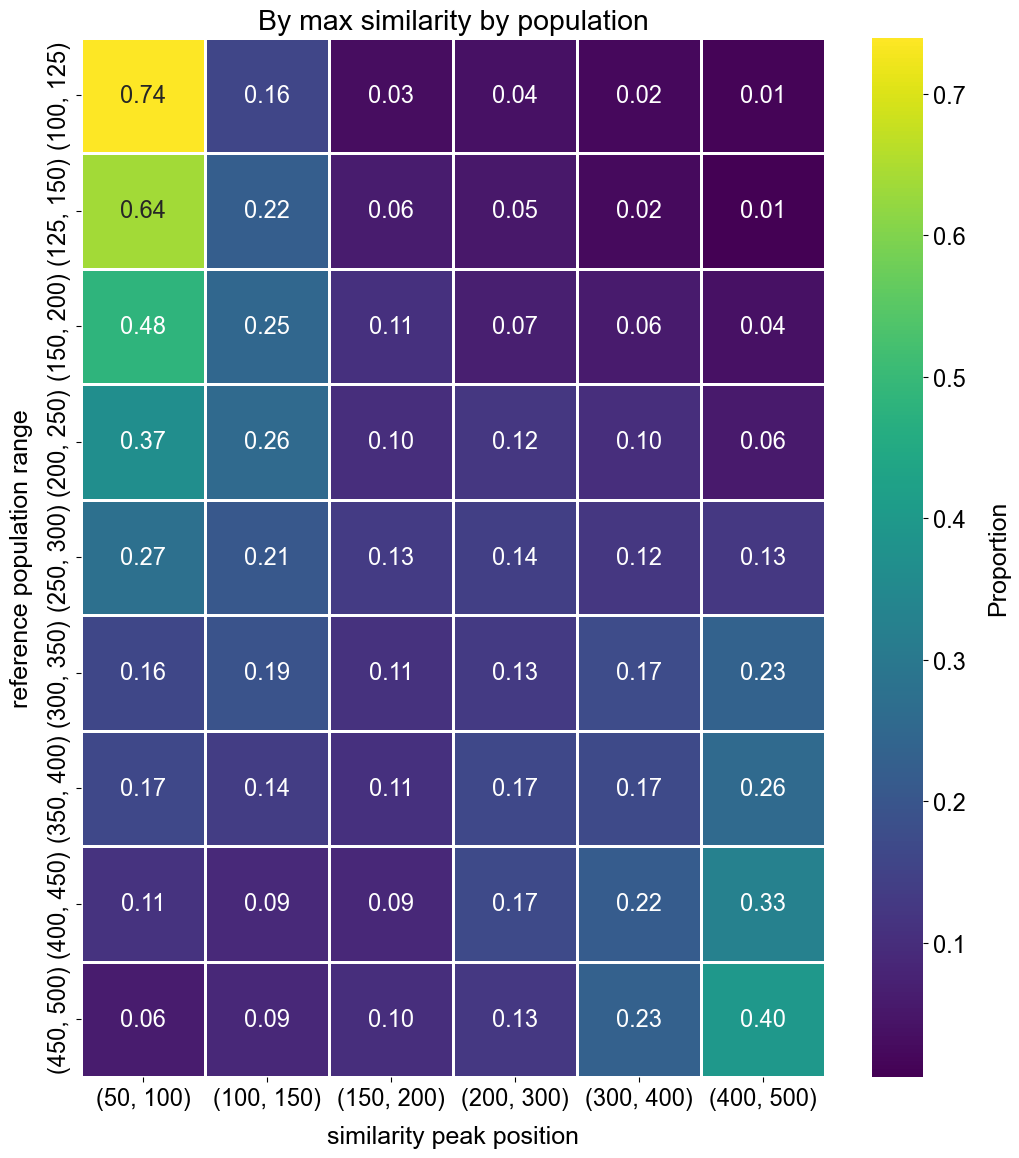

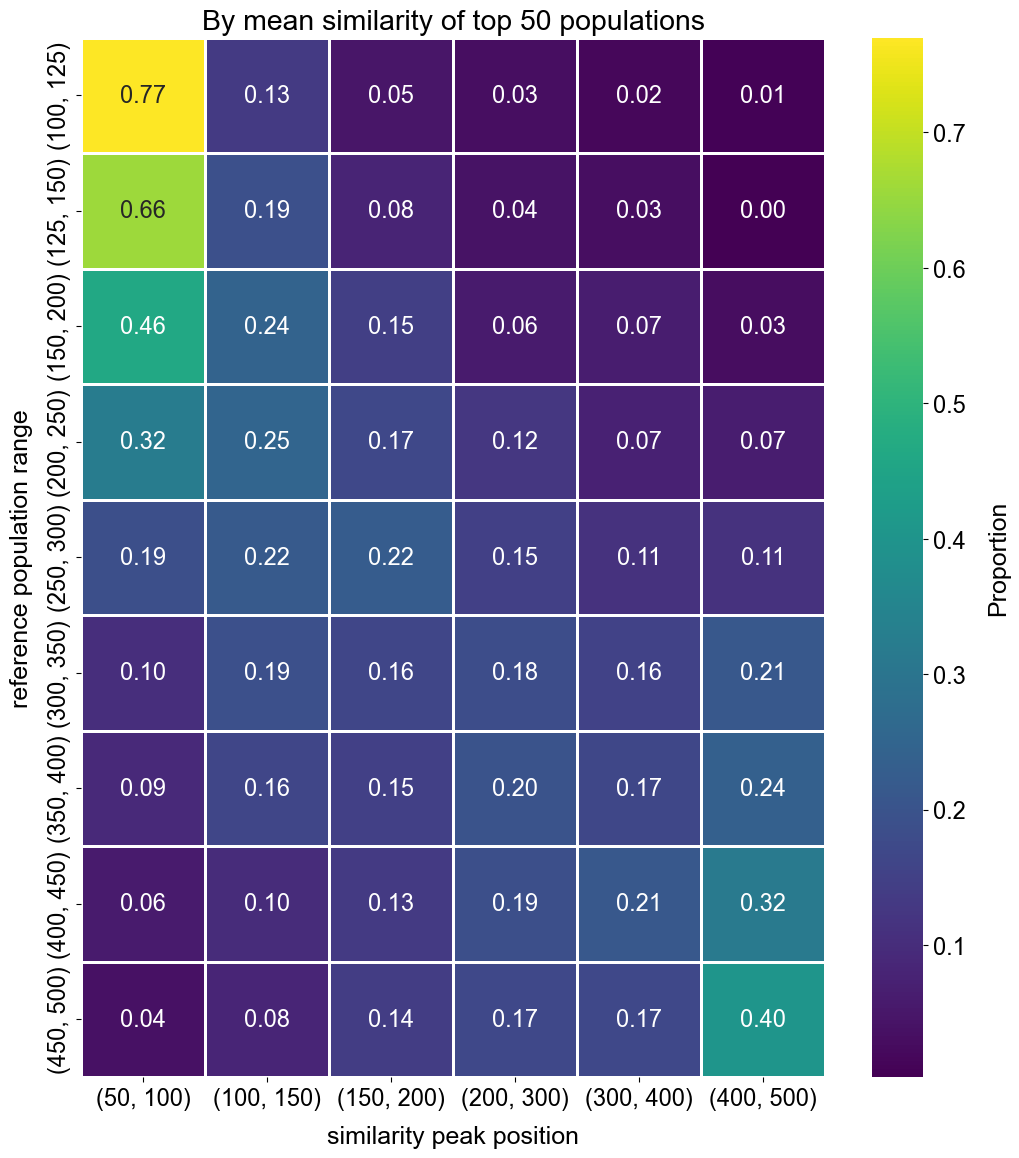

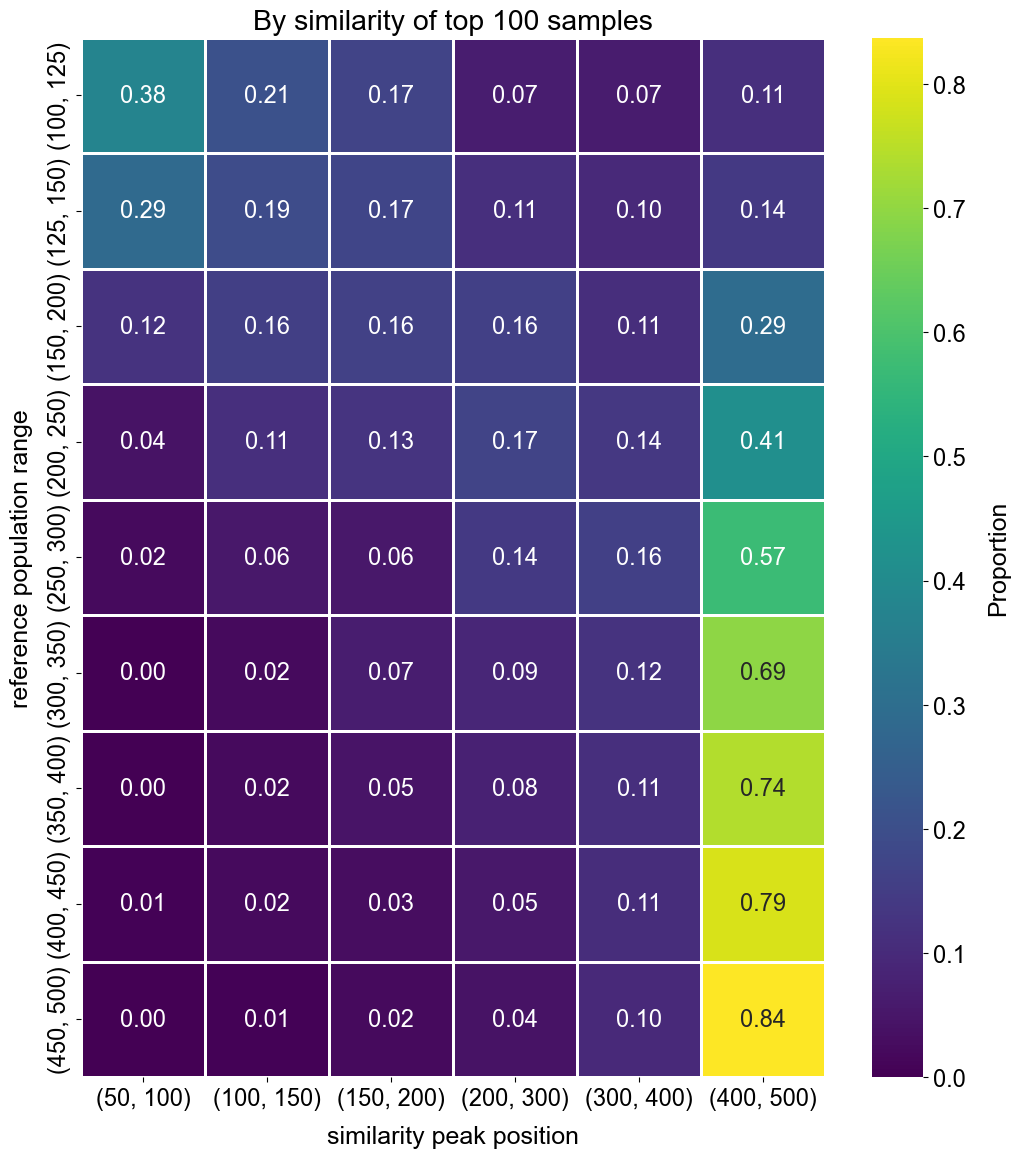

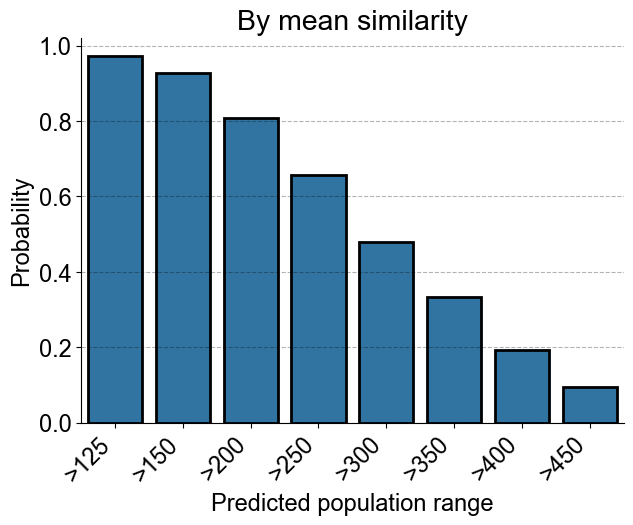

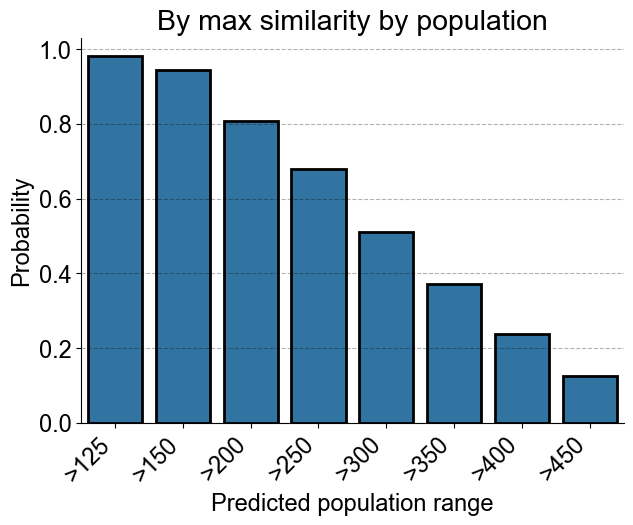

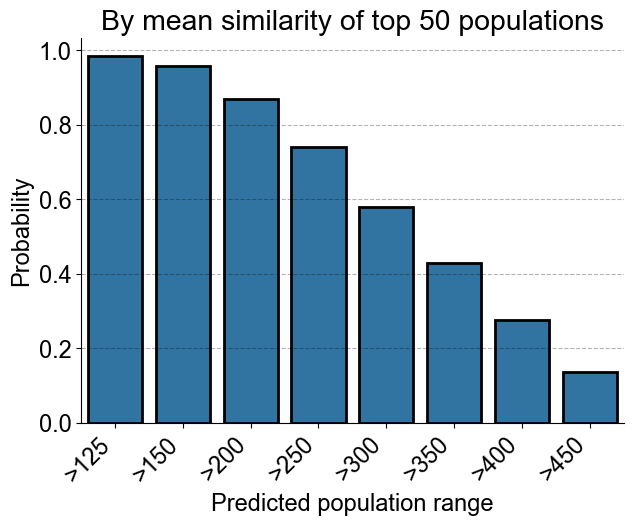

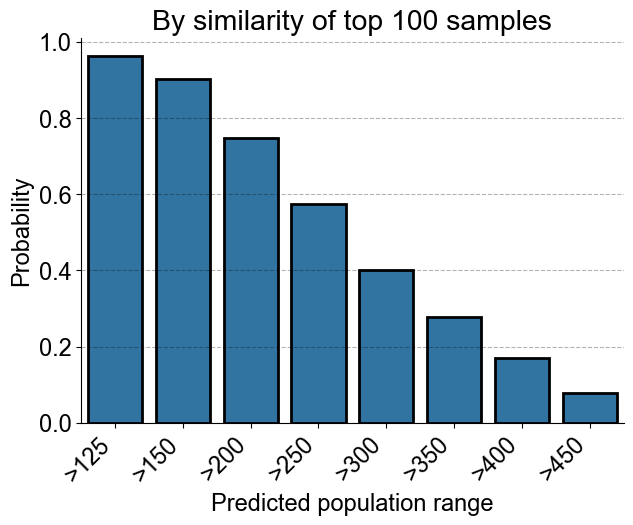

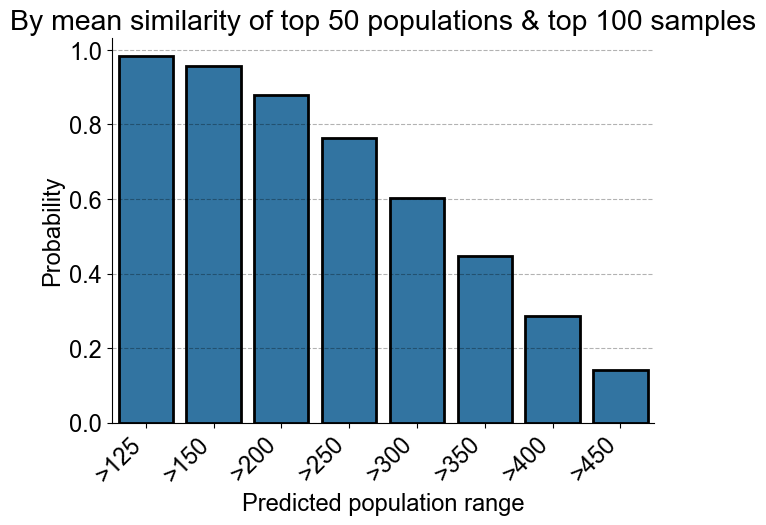

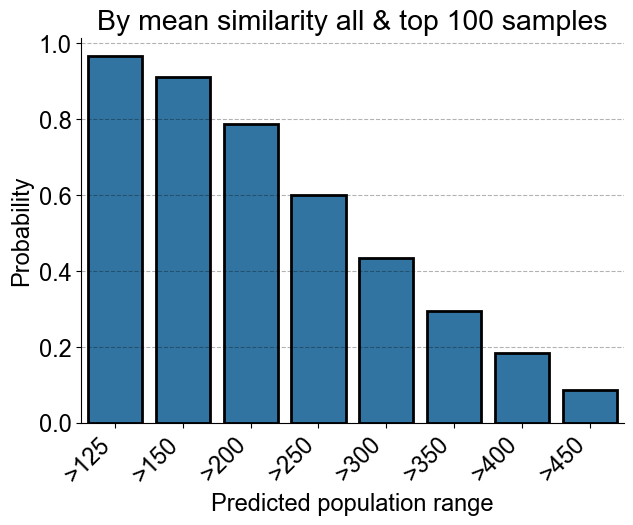

In [7]:
from post_processing_plot import get_population_probabilities, plot_heatmap

rcParams['font.size'] = 17
pop_ranges = [(50,100),(100,150),(150,200),(200,300),(300,400),(400,500)]
pop_ranges_str = [f'{pop}' for pop in pop_ranges]

sizes = [(100,125),(125,150),(150,200),(200,250),(250,300),(300,350),(350,400),(400,450),(450,500)]
sizes_str = [f'{pop}' for pop in sizes]
assert len(sizes)==test_data.shape[2]

argmax_dists_mean1 = np.zeros((len(sizes),6))
argmax_dists_max1 = np.zeros((len(sizes),6))
argmax_dists_top501 = np.zeros((len(sizes),6))
argmax_dists_top50_sample_1 = np.zeros((len(sizes),6))

argmax_dists_top50_tree_and_sample_1 = np.zeros((len(sizes),6,6))
argmax_dists_mean_and_sample_1 = np.zeros((len(sizes),6,6))

reps = test_data.shape[1]

for j, size in enumerate(sizes):
    for i in range(reps):
        
        mean_similarities = test_data[0,i,j,:]
        max_similarity_by_tree = test_data[1,i,j,:]
        mean_top50_similarity = test_data[2,i,j,:]
        mean_top50_sample_similarity = test_data[3,i,j,:]
        
        argmax_dists_mean1[j,np.argmax(mean_similarities)] += 1/reps
        argmax_dists_max1[j,np.argmax(max_similarity_by_tree)] += 1/reps
        argmax_dists_top501[j,np.argmax(mean_top50_similarity)] += 1/reps
        argmax_dists_top50_sample_1[j,np.argmax(mean_top50_sample_similarity)] += 1/reps
        
        argmax_dists_top50_tree_and_sample_1[j,np.argmax(mean_top50_similarity),np.argmax(mean_top50_sample_similarity)] += 1/reps
        argmax_dists_mean_and_sample_1[j,np.argmax(mean_similarities),np.argmax(mean_top50_sample_similarity)] += 1/reps
        

timestamp = datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
pdf = PdfPages(f'../plots/Artificial_pop_est_summary_{timestamp}.pdf')

fig1 = plot_heatmap(argmax_dists_mean1, 'By mean similarity', pop_ranges_str, sizes_str,
                    ylabel = 'reference population range', xlabel ='similarity peak position', quantity = 'Proportion')
fig2 = plot_heatmap(argmax_dists_max1, 'By max similarity by population', pop_ranges_str, sizes_str,
                    ylabel = 'reference population range', xlabel ='similarity peak position', quantity = 'Proportion')
fig3 = plot_heatmap(argmax_dists_top501, 'By mean similarity of top 50 populations', pop_ranges_str, sizes_str,
                    ylabel = 'reference population range', xlabel ='similarity peak position', quantity = 'Proportion')
fig4 = plot_heatmap(argmax_dists_top50_sample_1, f'By similarity of top {use_top} samples', pop_ranges_str, sizes_str,
                    ylabel = 'reference population range', xlabel ='similarity peak position', quantity = 'Proportion')


_,_,fig5 = get_population_probabilities(sizes, [2], argmax_dists_mean1, title = 'By mean similarity')
_,_,fig6 = get_population_probabilities(sizes, [2], argmax_dists_max1, title = 'By max similarity by population')
_,_,fig7 = get_population_probabilities(sizes, [2,3], argmax_dists_top501, title = 'By mean similarity of top 50 populations')
_,_,fig8 = get_population_probabilities(sizes, [3,4], argmax_dists_top50_sample_1, title = f'By similarity of top {use_top} samples')
_,probs_toptree_and_sample,fig9 = get_population_probabilities(sizes, [[2,3],[4,5]], argmax_dists_top50_tree_and_sample_1, multiple=True, 
                                         title = f'By mean similarity of top 50 populations & top {use_top} samples', write_txt='../plots/Fig_4G_data.txt')
_,probs_mean_and_sample,fig10 = get_population_probabilities(sizes, [2,[3,4]], argmax_dists_mean_and_sample_1, multiple=True, 
                                         title = f'By mean similarity all & top {use_top} samples', write_txt='../plots/Fig_4G_2,[3,4]data_do_not_use.txt')

plt.show()

# all_figs = [fig1,fig2,fig3,fig4,fig7,fig8,fig9,fig10]

# for fign in all_figs:
#     pdf.savefig(fign, bbox_inches='tight')
    
# pdf.close()

# with PdfPages(f'../plots/Fig_4I.pdf') as pdf:
#     pdf.savefig(fig11, bbox_inches='tight')

In [8]:
probs_mean_and_sample

[0.9659574468085106,
 0.9106382978723404,
 0.7872340425531916,
 0.6,
 0.4340425531914894,
 0.2936170212765957,
 0.1829787234042553,
 0.0851063829787234]

In [9]:
probs_toptree_and_sample

[0.983271375464684,
 0.9578686493184635,
 0.8785625774473358,
 0.7645600991325899,
 0.6022304832713755,
 0.44609665427509293,
 0.2874845105328377,
 0.1425030978934325]